# <center> SMU Master’s Program - MSDS 7331-403 - Summer 2018 </center>

### <center> Sarah Fite, Sheri Loftin, Kyle Thomas, and Casey Martinez </center> 

# <center> Project 3: Clustering  <center>

<a id="top"></a>
# Table of Contents
* <a href="#Import">Imports</a>
* <a href="#Business Understanding">**Business Understanding</a>
* <a href="#Data Understanding 1">**Data Understanding 1</a>
* <a href="#Data Understanding 2">**Data Understanding 2</a>
* <a href="#Modeling and Evaluation">**Modeling and Evaluation</a>
     - Option A: Cluster Analysis
       - **Modeling and Evaluation 1: Train and adjust paraments
           -  KMEANS
           -  DBSCAN
           -  Agglomerative
       - **Modeling and Evaluation 2: Evaluate and Compare 
           -  KMEANS
           -  DBSCAN
           -  Agglomerative
       - **Modeling and Evaluation 3: Visualize Results
           -  KMEANS
           -  DBSCAN
           -  Agglomerative
       - **Modeling and Evaluation 4: Summarize the Ramifications          
           -  KMEANS
           -  DBSCAN
           -  Agglomerative  
* <a href="#Deployment">**Deployment</a>    
* <a href="#Exceptional Work">**Exceptional Work</a>

"**" Denotes rubric items

### Imports

In [18]:
import sys
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.display import display, HTML
import matplotlib.pyplot as plt

# import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

In [10]:
# path = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Classificaiton2/"
#path = 'C:/Users/Casiano/Dropbox/SMU_DataScience/MSDS_7331_Data_Mining/Project3/'
path = 'C:/Users/SARAH/Documents/GitHub/DataMiningProject2/'
df = pd.read_csv(path + "SCADAcombined2017_T014_PROJECT3.csv")
data1= pd.read_csv(path + "dataset.csv")
data1= data1.set_index('Variable')



## Business Understanding (10 points total).
<i>• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?) 
How will you measure the effectiveness of a good algorithm? 
Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?<i>

For this project, we've selected a sample of data to analyze for predicting and measuring wind turbine performance and health.  Our dataset, consists of 52,463 observations for a single turbine for a single 24 hour period and was sampled from a larger dataset provided to Pattern Energy by the turbine manufacturer, Siemens Wind Power.  The data was collected by the manufacturer and, thus, provided to Pattern Energy, for the purpose of conducting performance analysis on their windmill farms.  

To assist Pattern Energy in perforance analysis endeavor, our team conducts clustering analysis of this dataset.  We evaluate turbine yaw position and wind direction. Performing clustering analysis on these attributes provides Pattern Energy insight into various events on performance and turbine health, such as enviornmental impacts, instrumentation and recording errors, and mechanical issues.  Yaw position is critical as an error in yaw position implies that a lower share of the energy in the wind runs through the rotor area, thus the turbine is not producing at maximum capacity.

For this analysis, we developed three models:

1. KNN
2. DBSCAN
3. Algomerative

???????Algorithm effectiveness is measured by purity through cluster cohesion and cluster separation.  There are numerous means of measurement by which this is measured, such as visual inspection, Sum of Squared Errors (SSE), Sillhouette Coefficient, graph based measurement, similarity matrix, and Calinski-Harabaz score.

???????


## Data Understanding 1 (10 points total)
_• [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file._ 

The imported dataset, SCADAcombined2017_T014_PROJECT3, contains 3 variables: TimeStamp, wtc_ScYawPos_mean, and WindDir_D1_WVT.  The variable type, scale, and meaning can be found below.
    


In [11]:
display(HTML(data1.to_html()))

_Verify data quality: 
Are there missing values? 
Duplicate data?
Outliers? 
Are those mistakes? 
How do you deal with these problems?_

After a quick investigation of the data (below (df.info()) we found that there were 11 values of NAN in the data set, all of which were in the Yaw Position column. These simply represent mistakes in the data. 

As there were so few of these values, we opted to drop them from the data set (below(df.drofna)).  

Furthermore, the TimeStamp data is of not use for this analysis, so we chose to drop it from the dataset at this point.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52462 entries, 0 to 52461
Data columns (total 3 columns):
TimeStamp            52462 non-null object
wtc_ScYawPos_mean    52451 non-null float64
WindDir_D1_WVT       52462 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.2+ MB


In [13]:
del df['TimeStamp']
df.dropna(inplace=True)
# df = df.reset_index()

df['WindDir_D1_WVT'] = 360 - df['WindDir_D1_WVT']

print("Dimensions of data frame: ", df.shape)
print(df.info())
df.head()

Dimensions of data frame:  (52451, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52451 entries, 0 to 52461
Data columns (total 2 columns):
wtc_ScYawPos_mean    52451 non-null float64
WindDir_D1_WVT       52451 non-null float64
dtypes: float64(2)
memory usage: 1.2 MB
None


wtc_ScYawPos_mean  WindDir_D1_WVT
0           350.3289          318.22
1           356.3080          321.73
2           359.3556          319.33
3           360.1000          321.14
4           358.4161          317.56

With the removal of "TimeStamp," we turn our focus to wind direction and yaw position.  Using df.describe, we note a fairly large range in the Yaw position data.  We run a histogram and boxplot to observe outliers.  We quickly observe that wind direction is fairly normal and absent of ouliers, while yaw position is quite laden with outliers. For the purpose of our project, outlier detection, this was expected and is not an issue.  Its actually, somewhat desirable, as it is the purpose the project and helps us prove out our hypothesis.

In [14]:
df.describe()

wtc_ScYawPos_mean  WindDir_D1_WVT
count       52451.000000    52451.000000
mean          157.688002      189.957559
std           137.692026       86.691331
min          -370.849800        0.000000
25%            99.591140      131.200000
50%           168.396100      166.600000
75%           207.800000      269.200000
max           620.519400      359.999000

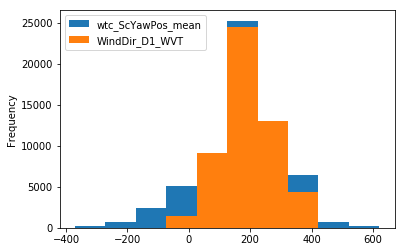

In [22]:
df.plot.hist()

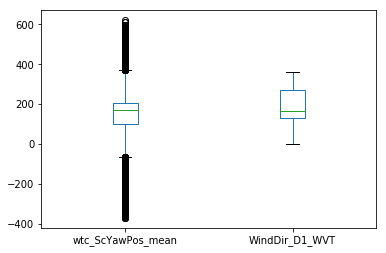

In [23]:
df.plot.box()

## Data Understanding 2 (10 points total)
<i>• [10 points] Visualize any important attributes appropriately. 
Important: Provide an interpretation for any charts or graphs. <i>

Before we begin cluster analysis, we conduct some initial, basic plotting to see if there are any obvious groupings with wind direction and yaw position. Looking at the results (below), we see three obvious groups that move diagonally upward from left to right. As a result, we start our clustering exercises at 3; however, we also conduct some other parameter searches to see if there are any other relationships that may not be immediately obvious at first glance.

In [19]:
import matplotlib.pyplot as plt
wind_dir = df_drop["WindDir_D1_WVT"]
yaw = df_drop['wtc_ScYawPos_mean']

plt.figure(figsize=(15,10))
plt.scatter(wind_dir, yaw)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.axis('tight')
plt.legend()
plt.title("Yaw Position vs Wind Direction", fontsize=20)
plt.show()

NameError: name 'df_drop' is not defined

## Modeling and Evaluation (50 points total)
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

• [10 Points] Train and adjust parameters

• [10 Points] Evaluate and Compare

• [10 Points] Visualize Results

• [20 Points] Summarize the Ramifications

### Option A: Cluster Analysis
• Train and adjust parameters:  _Perform cluster analysis using several clustering methods (adjust parameters) _

• Evaluate and Compare: _Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?_

• Visualize Results: _Use tables/visualization to discuss the found results. Explain each visualization in detail_

• Summarize Ramifications: _Describe your results. What findings are the most interesting and why?_

 ## Modeling and Evaluation 1: Train and adjust parameters (10 points) 

**Perform Cluster Analysis Using Several Clustering methods and adjust parameters 

First, we look at wind speed vs historical power output. It will be interesting to see how different turbines are clustered together, especially if their name plate capacity is different across clusters.

## KMeans Clustering: Train and adjust parameters

In [25]:
# Significant code was borrowed and insipred by in class notebooks
# Specifically, notebooks [insert here] were the most used in this section.
from sklearn.cluster import KMeans

n_clust = 3

X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
cls_kmeans.fit(X1_drop)
kmeans_labels  = cls_kmeans.labels_

X1_drop = X1_drop.values
plt.figure(figsize=(10,10))
plt.scatter(X1_drop[:,0], X1_drop[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.axis('tight')
plt.legend()
plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
plt.show()


NameError: name 'df_drop' is not defined


First, the initial clusters were not what we were expecting. It appears that the algorithm found some interesting sub-optimal clusters that appear to be more triangular in shape. This is not what the group was expecting. Notice how the green cluster include both bottom and middle diagonal bands. These two groups should not be in the same cluster.

We now have several options to try an find a more optimal cluster. We will first try to change the number of clusters used (if this still results in sub-optimal clusters then we will also change the initialization method). To validate the results, we will create a simple for-loop between the values of 3 and 10 where the current number will be passed onto the "n_clust" parameter in SKLearn. 

Based on the results we will likely find several models that are "optimal" in that the clusters form around the areas that we would expect. Once these models are identified, we will then use some validation techniques that are available within SKLean to determine which model is the best one.

In [27]:
# Significant code was borrowed and insipred by in class notebooks
# Specifically, notebooks 9 was the most used in this section.

for x in range(3,11):
    n_clust = x

    X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


    cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
    cls_kmeans.fit(X1_drop)
    kmeans_labels  = cls_kmeans.labels_

    X1_drop = X1_drop.values
    plt.figure(figsize=(10,10))
    plt.scatter(X1_drop[:,0], X1_drop[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
    plt.ylabel("Yaw Position", fontsize=20)
    plt.xlabel("Wind Direction", fontsize=20)
    plt.axis('tight')
    plt.legend()
    plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
    plt.show()


NameError: name 'df_drop' is not defined

After conducting a simple search for optimal clusters, we found that the model started to look as we expected after only four clusters were required. After four clusters, the algorithm started to sub-divide the groups into smaller and smaller sub-clusters. This is less than ideal, but unavoidable using the K-Means algorithm. This data set poses some challenges for K-Means. First, the clusters are of different sizes. In addition, the shapes of the clusters are non-globular. These two features of the data make it difficult to get the clustering that we want on this data set using the K-Means algorithm.


It should also be noted that there are still a lot of noise points that are classified with a cluster. This is one of the drawbacks of using K-Means. **Other clusering methods may result in better grouping with less noise included in the groups.** 

## DBSCAN: Train and adjust parameters

In order to train the DBSCAN clustering algorithm, the hyperparameters of Minimum Samples and Epsilon needed to be explored. Since the scoring of the model is not available witht the sci-kit learn package, the GridSearch function cannot be used like we did with supervised learning. The method here is two nested for-loops for each hyperparameter. The range for each was determined to avoid gross mislabeling. For each loop, the number of clusters was calculated(not including noise points) along with the silhouette score.  

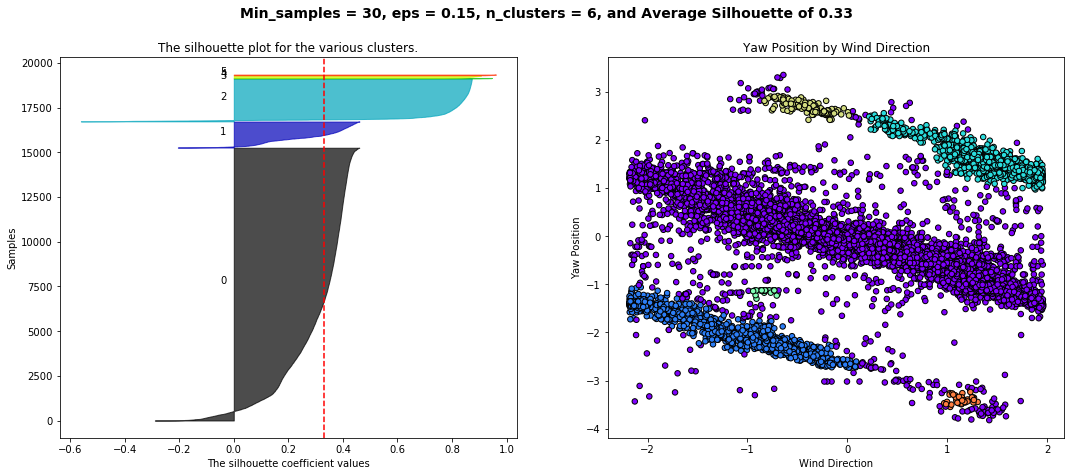

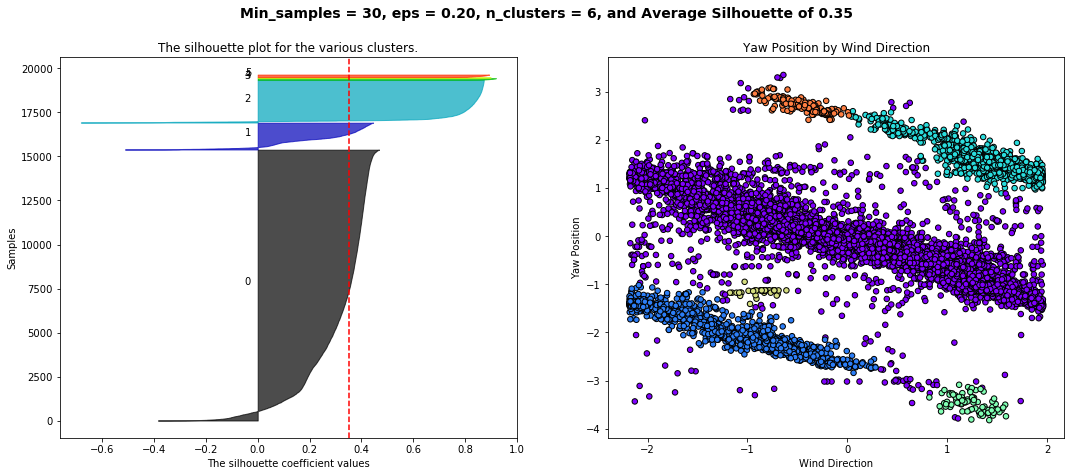

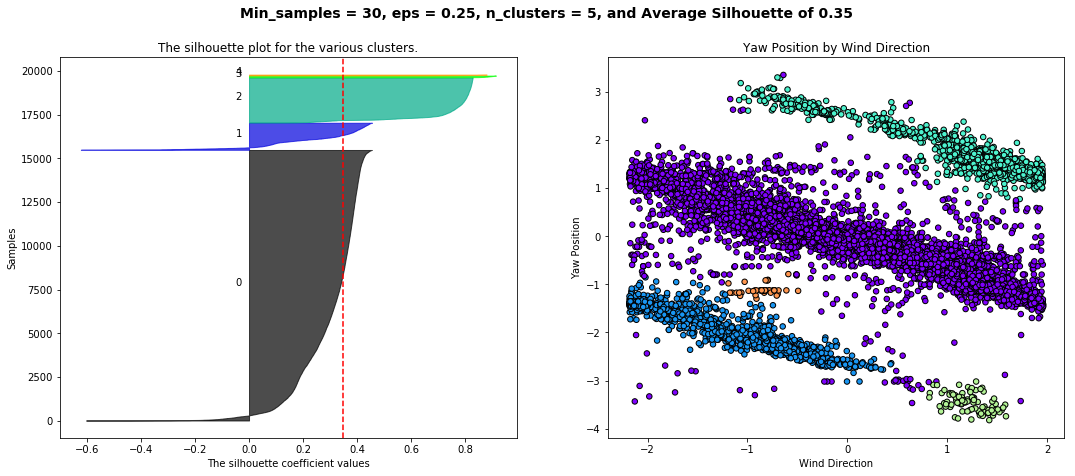

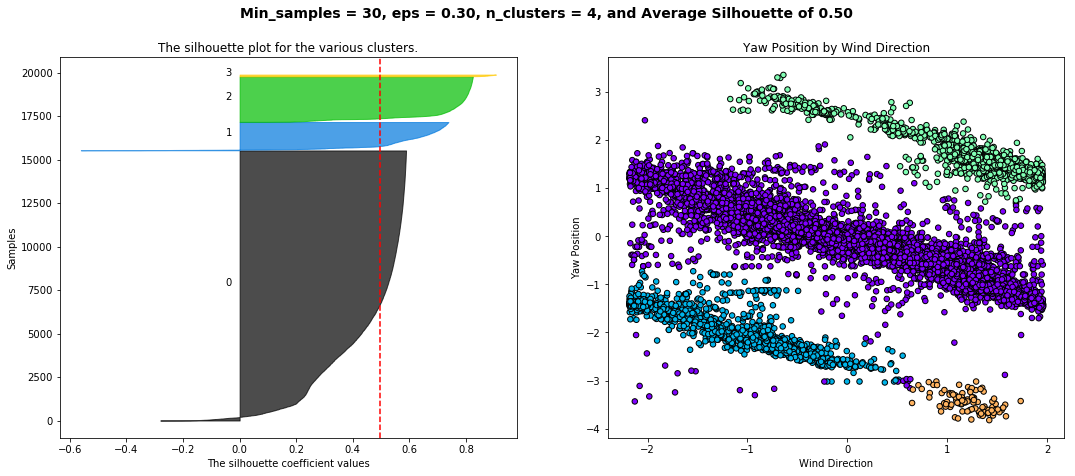

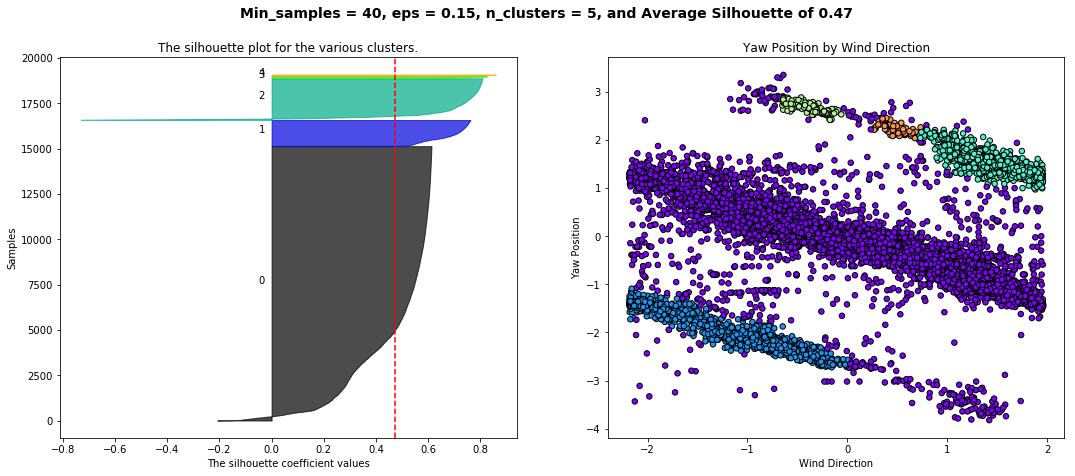

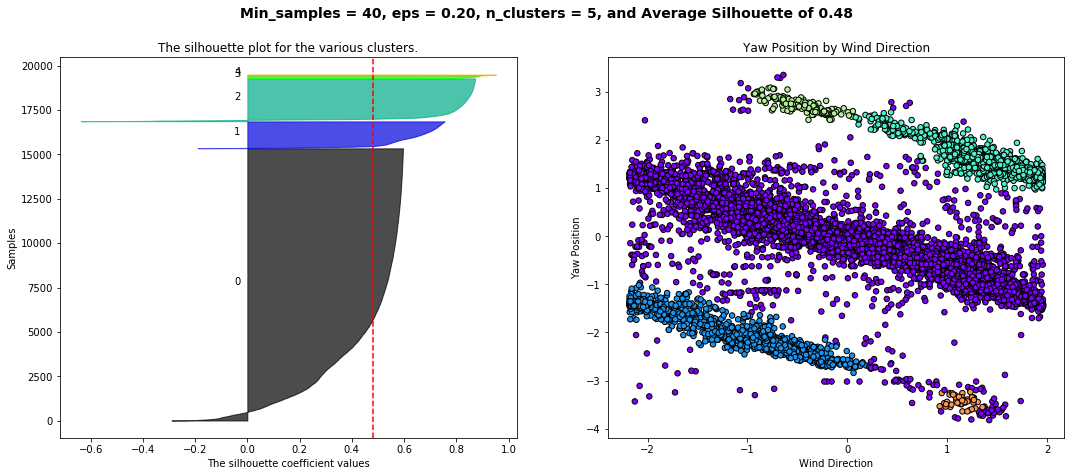

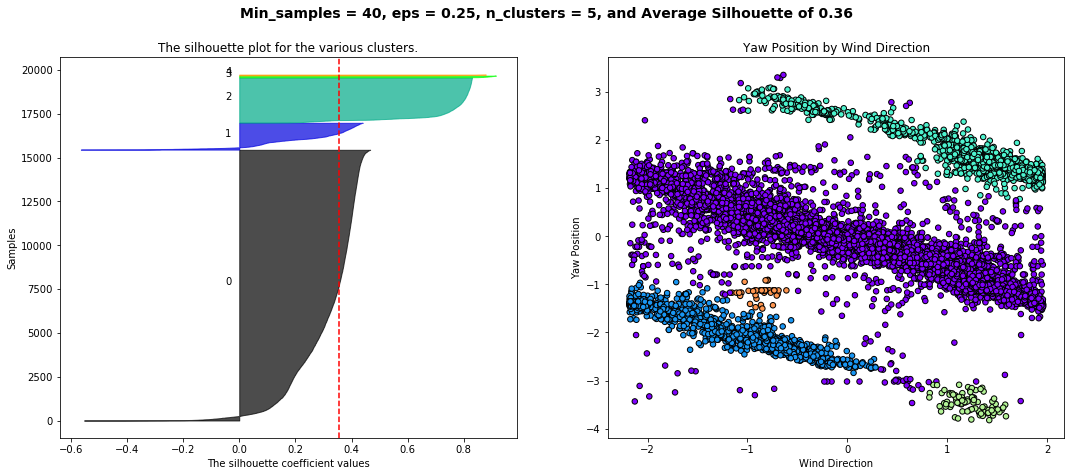

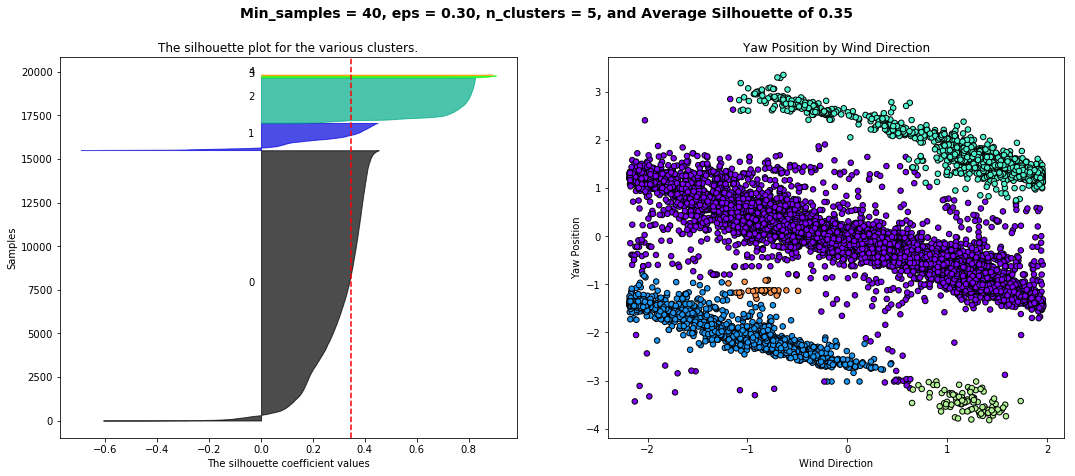

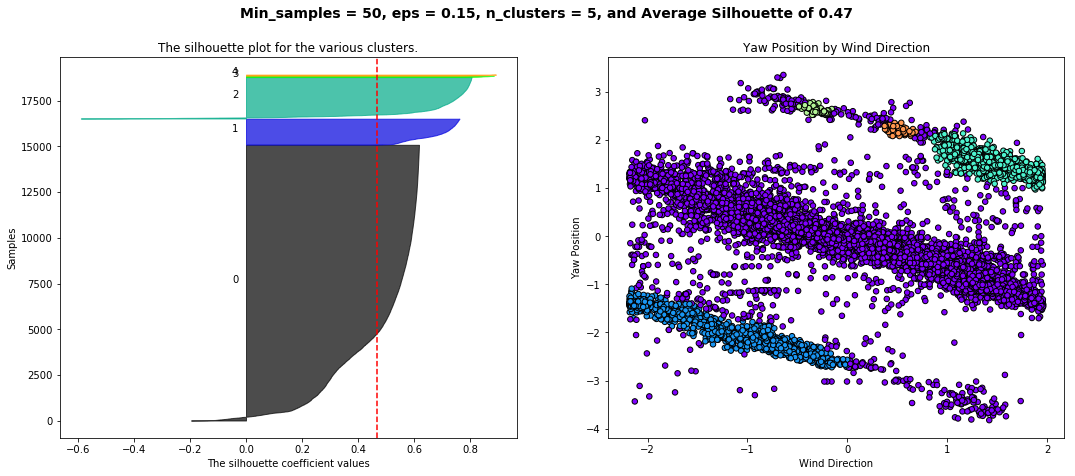

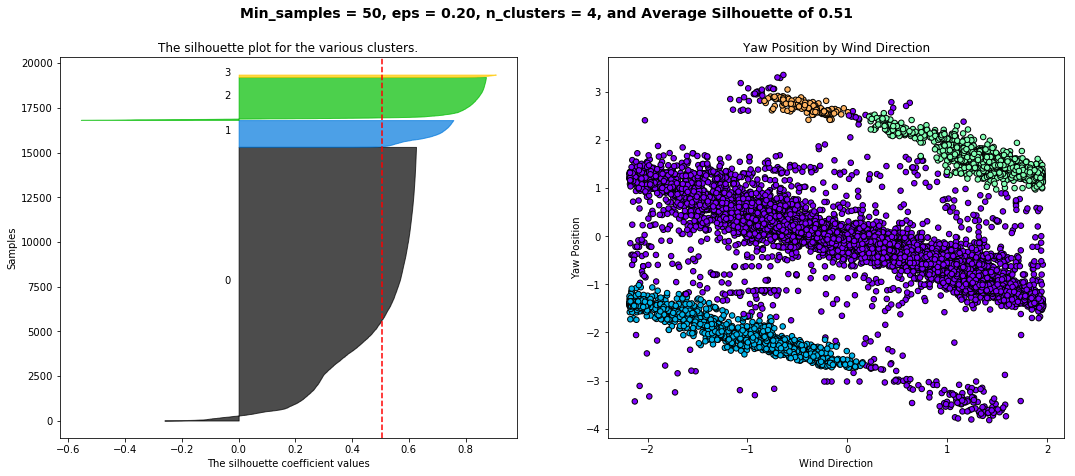

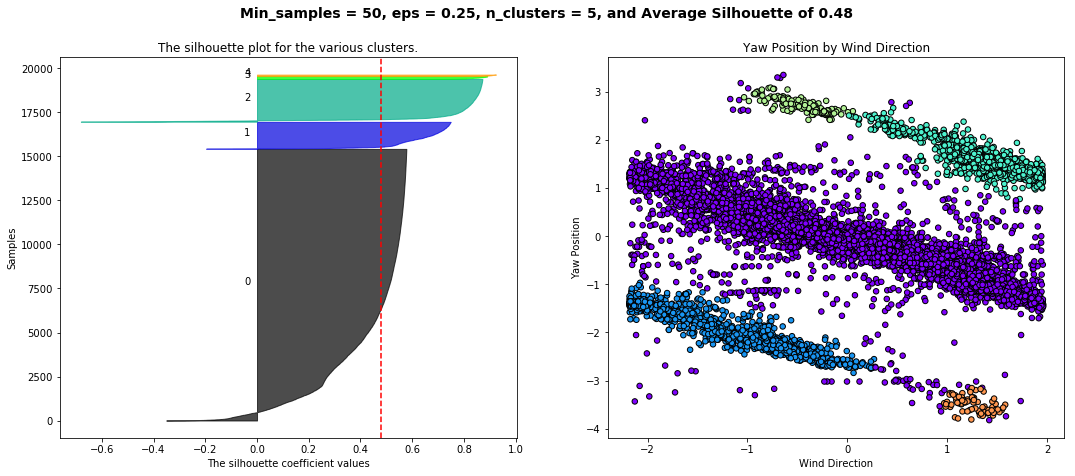

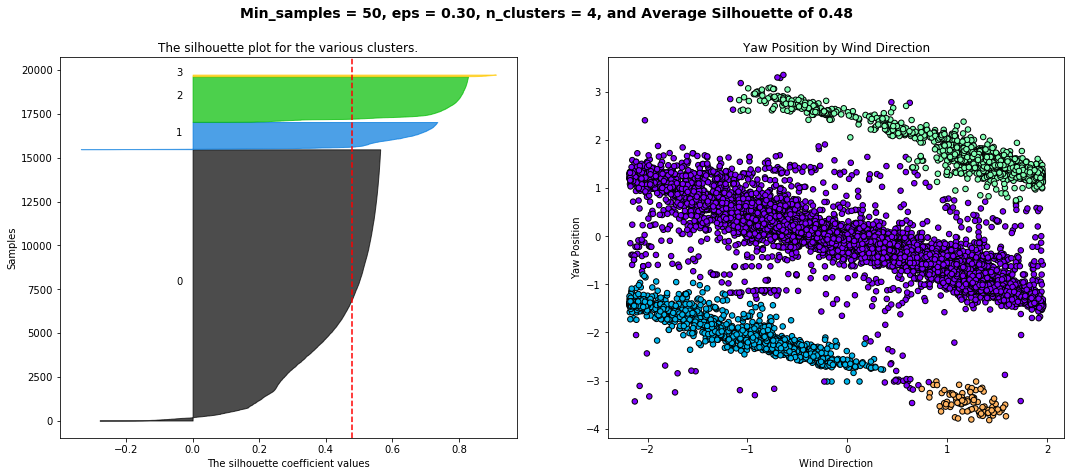

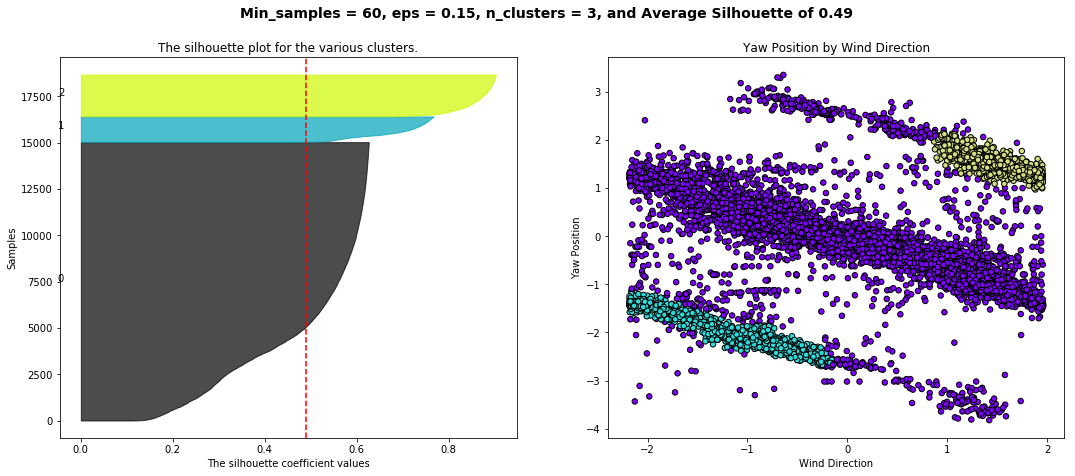

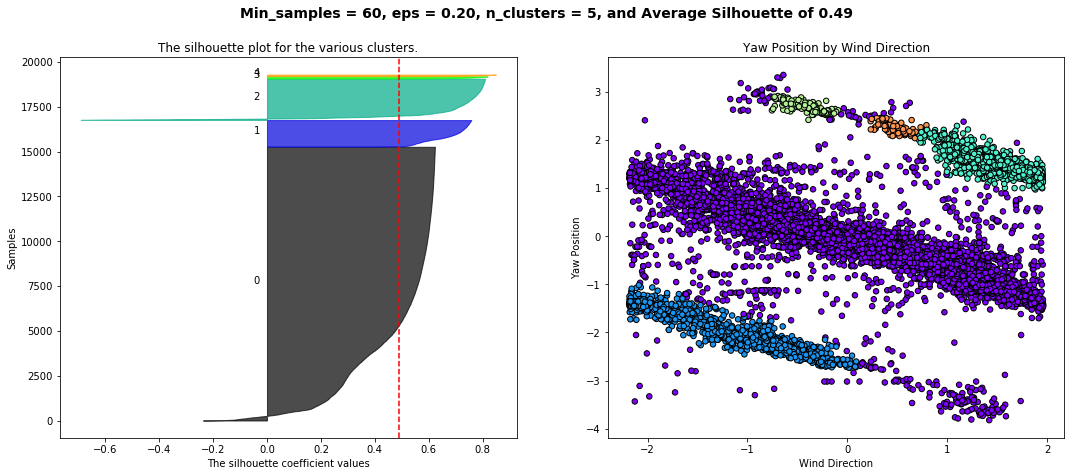

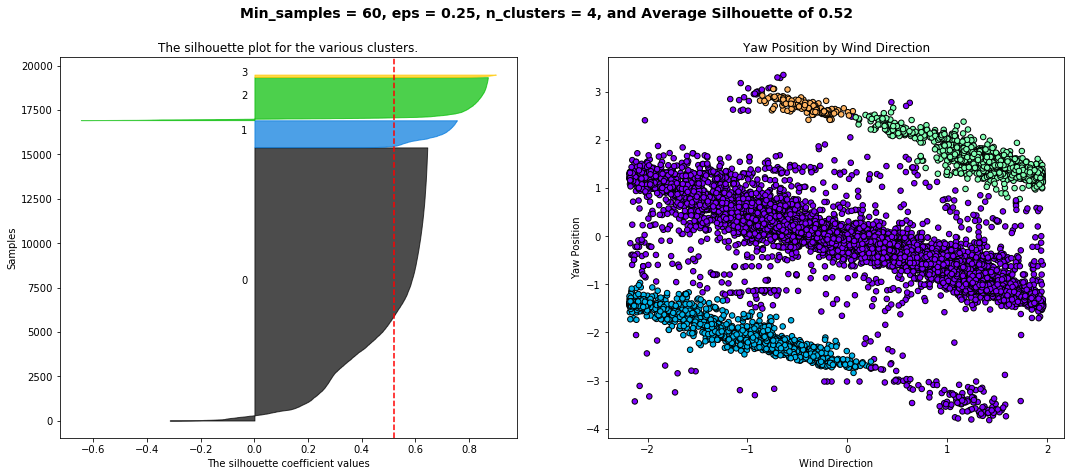

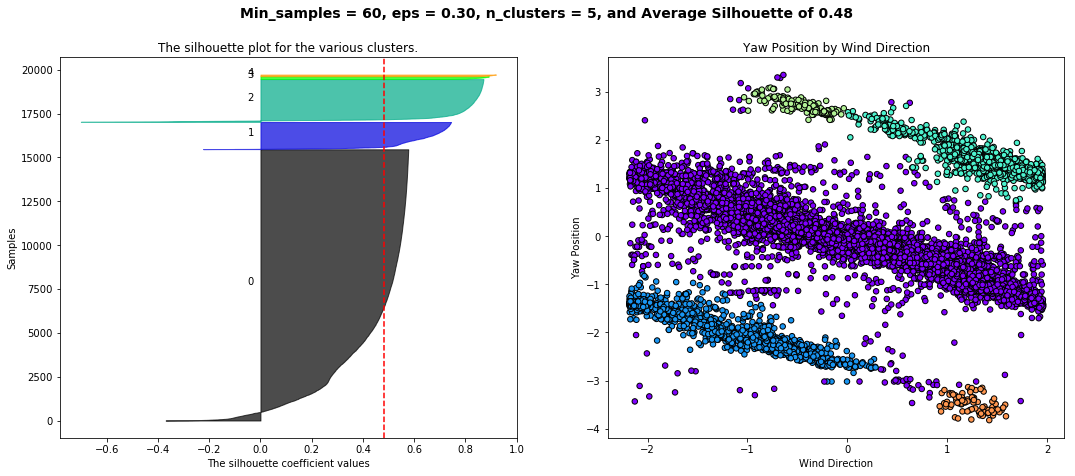

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df.sample(20000, replace=False))

score_list = []
cluster_list = []

min_samples_range = range(30,70,10)
eps_range = np.arange(0.15,0.35,0.05)

for min_samples in min_samples_range:
    for eps in eps_range:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(X)
        cluster_labels = model.labels_

        n_clusters = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
        cluster_list.append(n_clusters)
        
        silhouette_avg = silhouette_score(X, cluster_labels)
        score_list.append(silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Samples")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        # 2nd Plot showing the actual clusters formed
        colors = cm.rainbow(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 1], X[:, 0], marker='o', s=30, c=colors, edgecolor='k')

        ax2.set_title("Yaw Position by Wind Direction")
        ax2.set_ylabel("Yaw Position")
        ax2.set_xlabel("Wind Direction")

        plt.suptitle("Min_samples = %i, eps = %.2f, n_clusters = %i, and Average Silhouette of %.2f" %(min_samples, eps, n_clusters, silhouette_avg), fontsize=14, fontweight='bold')
        plt.show()

# References: 
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py
# http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py


I do not believe the silhouette metric is the best way to evaluate clustering on this dataset. Skewed results are due to the non-convex nature of the clusters. Below is a graph of how the silhouette score changes with the number of clusters. As you can see, four clusters give the best results. 

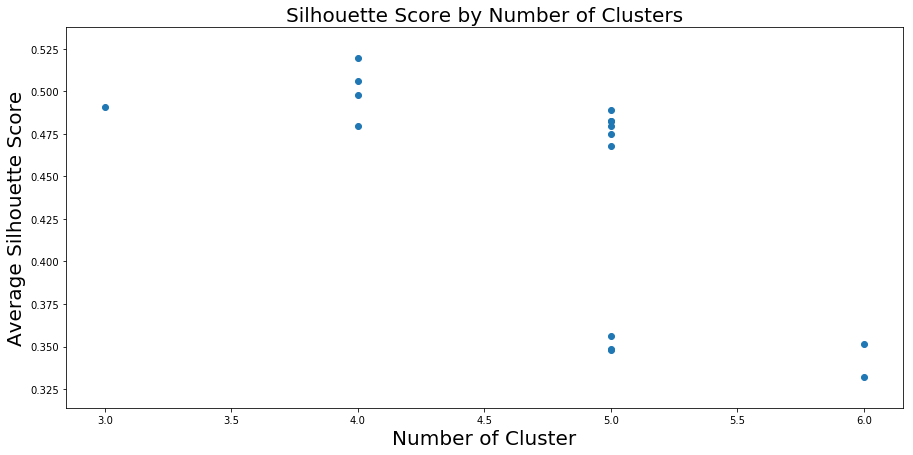

In [28]:
# Plot Silhouette score by cluster size

plt.figure(figsize=(15,7))
plt.scatter(x=cluster_list,y=score_list)
plt.ylabel("Average Silhouette Score", fontsize=20)
plt.xlabel("Number of Cluster", fontsize=20)
plt.title("Silhouette Score by Number of Clusters", fontsize=20)

plt.show()

## Agglomerative Clustering: Train and adjust parameters

In [31]:
# Smaller sample size for easier work
df2 = df.sample(10000, replace=False)

# Fill in NaN data wil 999

df_fill = df2.fillna(999)

# option 2: drop na rows
df_drop = df2.dropna(axis=0)

In [32]:
X1_fill = df_fill[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]

X1_fill.head()

WindDir_D1_WVT  wtc_ScYawPos_mean
23871           230.3           196.9008
7339            345.6           -33.3000
45985           234.7           199.8000
10476           234.6           165.1575
18465           143.9           114.6709

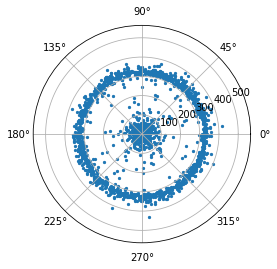

In [60]:
import matplotlib.pyplot as plt

# With both the Wind Direction and the Yaw Mean expressed in degrees, a better measure of Yaw is how far it differs from the 
# wind direction.
wind_dir = df_fill["WindDir_D1_WVT"]
yaw = df_fill['wtc_ScYawPos_mean'] - wind_dir

X1_fill['yaw'] = yaw
# source: https://matplotlib.org/gallery/pie_and_polar_charts/polar_scatter.html#sphx-glr-download-gallery-pie-and-polar-charts-polar-scatter-py

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

ax.scatter(wind_dir, yaw, s=5)


In [62]:
# adding the yaw/wind direction difference to dataframe
X1_fill['yaw_diff'] = yaw

X1_fill.head()

WindDir_D1_WVT  wtc_ScYawPos_mean  yaw_diff
23871           230.3           196.9008  -33.3992
7339            345.6           -33.3000 -378.9000
45985           234.7           199.8000  -34.9000
10476           234.6           165.1575  -69.4425
18465           143.9           114.6709  -29.2291

#### To better "see" the data, we have chosen a polar projection. The variables we are attempting to cluster are both expressed in degrees. 

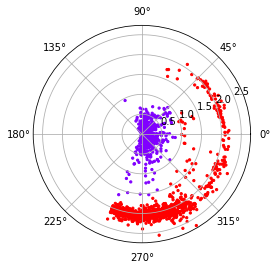

In [63]:
# AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, 
# memory=None, connectivity=None, compute_full_tree=’auto’, linkage=’ward’, 
# pooling_func=<function mean>)
# fit(X, y=None)
# fit_predict(X, y=None)
# set_params(**params)


import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

StandardScalerX = StandardScaler().fit_transform(X1_fill)

model = AgglomerativeClustering(n_clusters=2)
model.fit(StandardScalerX, y=None)

# plt.figure(figsize=(10,10))
# plt.scatter(StandardScalerX[:,0], StandardScalerX[:,1], c=model.labels_, cmap=plt.cm.rainbow)
# plt.ylabel("Yaw Position", fontsize=20)
# plt.xlabel("Wind Direction", fontsize=20)
# plt.axis('tight')
# plt.legend()
# plt.title("Yaw Position vs Wind Direction: Clustering with 2 groups", fontsize=20)
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')

ax.scatter(StandardScalerX[:,0], StandardScalerX[:,2], c=model.labels_, cmap=plt.cm.rainbow, s=5)

### Determining the appropriate linkage, connectivity and number of clusters that best suit our dataset.
#### In looking at the data, there doesn't seem to be a need for a large number of clusters. It is clear that more than one cluster is needed but in visually reviewing the scatterplot there are also likely less than ten clusters. Creating a loop that presents each connectivity and linkage option with the number of clusters varying between two and nine captures the most likely best options.

## Modeling and Evaluation 2: Evaluate and Compare

## KMEANS:  Evaluate and Compare


So, it seems that after four clusters that there is little improvement to the grouping; at least to the human eye when looking at the scatter plots. However, we wanted to see if there was any improvement in accuracy of the models. This can be somewhat tricky as there is no "ground truth" for these points. However, there are some methods that can be used to determine accuracy of the K-Means Clusters.

This will be done several ways. First, via a visual inspection using a Similarity Matrix. Also, we will use the Sum of Square Error (which in this case is distance to the nearest cluster). and plot the SSE as the number of clusters increases. Finally, we will use the Silhouette Coefficient (where we will be looking for higher values as this indicates more defined clusters). 

Based on a visual inspection of the scatter plots, an investigation of the similarity matrices, a SSE analysis, and Silhouette Score analysis the optimal number of clusters for the data set and the K-Means algorithm is 4 clusters. This was the optimal cluster in each analysis. A breakdown of each analysis is shown below along with the respective code and supporting visualizations.

**Similarity Matrix Discussion** - First, it should be noted that this data set was too large to create the similarity matrix with all of the data. So, to get around this problem 3000 observations were randomly sampled to create the matrix. A similarity matrix graph was created for each analysis (number of clusters from 3 to 10). The similarity matrix plots the euclidean distance between the cluster labels for each point. Thus, we would expect points in the same cluster to be very similar to each other, and points not in the same cluster to be less similar. Ideally, we would expect the see high similarity along the diagonal of the graph and very little if any similarity on the off diagonal.

With this in mind, we can see that with only three clusters the similarity matrix does not perform very well (especially the middle square). As more clusters are added similarity along the diagonal increases, however, after 5 clusters there is more similarity on the off diagonal as well. Based on these matrices I would say that there is evidence that three, four, or five clusters would be optimal. However, it is difficult to determine which is the most optimal. Further analysis will be conducted to determine the optimal number of clusters.

## DBSCAN:  Evaluate and Compare

I do not believe the silhouette metric is the best way to evaluate clustering on this dataset. Skewed results are due to the non-convex nature of the clusters. Below is a graph of how the silhouette score changes with the number of clusters. As you can see, four clusters give the best results. 

In [30]:
# Plot Silhouette score by cluster size

plt.figure(figsize=(15,7))
plt.scatter(x=cluster_list,y=score_list)
plt.ylabel("Average Silhouette Score", fontsize=20)
plt.xlabel("Number of Cluster", fontsize=20)
plt.title("Silhouette Score by Number of Clusters", fontsize=20)

plt.show()

NameError: name 'cluster_list' is not defined

### Agglomerative:  Evaluate and Compare

In [26]:
# Clustering metric calinski harabaz score 
# If the ground truth labels are not known, the Calinski-Harabaz index 
# (sklearn.metrics.calinski_harabaz_score) can be used to evaluate the model, where a 
# higher Calinski-Harabaz score relates to a model with better defined clusters.

# source: http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index

from sklearn import metrics
from sklearn.metrics import pairwise_distances

# for connectivity in (None, knn_graph):
for n_clusters in (9, 8, 7, 6, 5, 4, 3, 2):
        model = AgglomerativeClustering(linkage=linkage,
                                            n_clusters=n_clusters)
        model.fit(StandardScalerX)
        labels = model.labels_
        score = metrics.calinski_harabaz_score(StandardScalerX, labels)
        print("For ", n_clusters, " clusters the Calinski Harabaz score is", score, ".")

NameError: name 'AgglomerativeClustering' is not defined

## Modeling and Evaluation 3: Visualize Results

## KMEANS:  Visualize Results

In [ ]:
# plot the similarity matrix
# Code adapted from Class Notebook 10
from sklearn.metrics import pairwise

# X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]
# X1_drop.dropna(axis=0, inplace=True)
# len_x = list(range(0,len(X1_drop)))
# my_choice = np.random.choice(len_x, 1000, replace=False)
X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]
data = X1_drop.sample(3000, replace=False)


for x in range(3,11):
    n_clust = x


    cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
    cls_kmeans.fit(data)
    kmeans_labels  = cls_kmeans.labels_

    # There is to much data to plot the entire Similarity Matrix 
    # on my machine. To compat this, a random sample of 
#     data = X1_drop[:3000]
    # data.dropna(axis=0, inplace=True)

    y=kmeans_labels

    idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
    data_sorted = data.values[idx_sorted]  # sort the dataset by class. Note that if using python 3 need .loc
    %time 
    R = pairwise.euclidean_distances(data_sorted)  # calculate the similarity

    #transform distance to similarity
    min_r = np.min(R)
    max_r = np.max(R)
    R = 1-(R-min_r)/(max_r-min_r)

    # plt.figure(figsize=(20,10))
    plt.figure(figsize=(10,10))
    plt.title("Similarity Matrix with {} Clusters".format(n_clust), fontsize=20)
    plt.pcolormesh(R)
    plt.colorbar()

    # plot class boundaries
    bounds = np.cumsum([np.sum(y==val) for val in np.unique(y)])
    for b in bounds:
        plt.plot([b,b],[0, len(y)],'k',linewidth=4)
        plt.plot([0, len(y)],[b,b],'k',linewidth=4)


    plt.show()

In [ ]:
idx_sorted = np.argsort(y,kind="quicksort")  # need to get the ordering of Y
data_sorted = data.values[idx_sorted]  # sort 

**Analysis of SSE** 

Below is a plot of SSE as a function of the number of clusters in the K-Means algorithm. SSE was calculated using the built in function "inertia_". This "inertia_" values is defined as "Sum of squared distances of samples to their closest cluster center". In this analysis we opted to investigate clusters numbering between 3 and 20 to see if there was a drop off in the error rate.

We can see that as more clusters are added that the overall error decreases. It appears that the elbow of the graph appears around 4 or 5 clusters indicating that our visual analysis of the scatter plots was in line with more rigorous methods.

A table is shown below the graph with the actual error to provide more context to the graph.

In [ ]:
# inspired by: http://www.awesomestats.in/python-cluster-validation/ 
import seaborn as sns
plt.style.use('fivethirtyeight')

errors = []

for num in range(3,20):
    cls_kmeans = KMeans(n_clusters= num, init='k-means++', random_state=1)
    cls_kmeans.fit(X1_drop)
#     kmeans_labels  = cls_kmeans.labels_
    errors.append(cls_kmeans.inertia_)

error_df = pd.DataFrame({'Number of Clusters': range(3,20), "Error": errors})

plt.figure(figsize=(12,6))
plt.title("SSE by Number of Clusters", fontsize=20)
plt.xlabel("Number of Clusters", fontsize=20)
plt.ylabel("SSE", fontsize=20)
plt.plot(error_df['Number of Clusters'], error_df['Error'], marker="o")

In [ ]:
error_df.round(2)

**Analysis of Silhouette Score**

A Silhouette Score ranges in value from -1 to 1. High positive values indicate that the points are cohesive to their own clusters when compared to others. Low negative values indicate that a point is not grouped well. Values near 0 indicate that a point is on a boundary and could belong to either group.

The data set is to large to conduct a Silhouette Score on the entire dataset (a memory error occurs, when tracing the stack and trouble shooting this is caused by insufficient memory). To combat this, we opted to use the same approach as we used in the Similarity Matrix. We ran the Silhouette Score built in function on a random sample of 5000 observations.

We see that based on the Silhouette Analysis that the optimal clustering is achieved when there around 4 clusters. Four clusters has the strongest score by far.

In [ ]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
data = X1_drop.sample(5000, replace=False)

for x in range(3,11):
    cls_kmeans = KMeans(n_clusters= x, init='k-means++', random_state=1)
    cls_kmeans.fit(data)
    kmeans_labels  = cls_kmeans.labels_

    s = metrics.silhouette_score(data, kmeans_labels, metric='euclidean')
    print("Silhouette Score when using {} Clusters: {}".format(x, s))

## DBSCAN:  Visualize Results

After visual inspection of the color-coded clusters, I believe the best tuned parameters are: Min Samples 50 & Epsilon 0.3. This model is shown below. The model captures the top two clusters very well. The red cluster could be considered noise and the lower cluster could be considered as two separate clusters but overall the model is good. It is clear to see how the two parameters determine the number of clusters and also now many outliers are identified. A model of 40 minimum samples and 0.25 epsilon gives a very good model but the same model with 0.3 epsilon does not. 


In [31]:
eps = 0.3
min_samples = 40

model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1).fit(X)

core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.rainbow(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(15,10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)



plt.title("Best DBSCAN Hyperparameters: Min Samples %i & Epsilon %.2f" %(min_samples, eps), fontsize=20)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.show()

NameError: name 'X' is not defined

## Agglomerative: Visualize Results

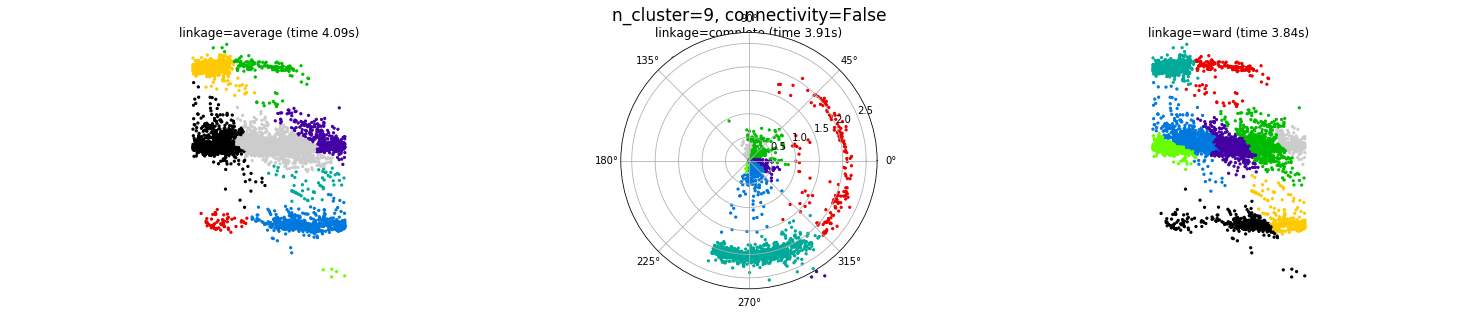

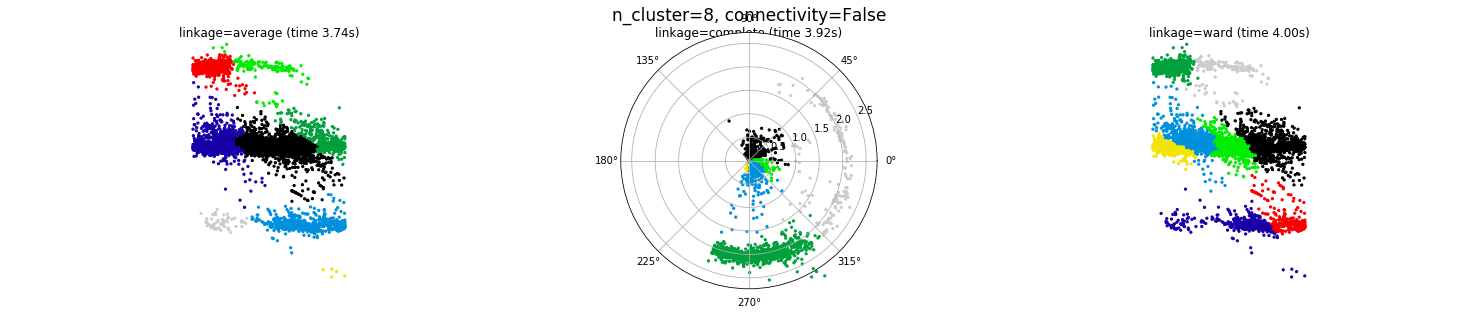

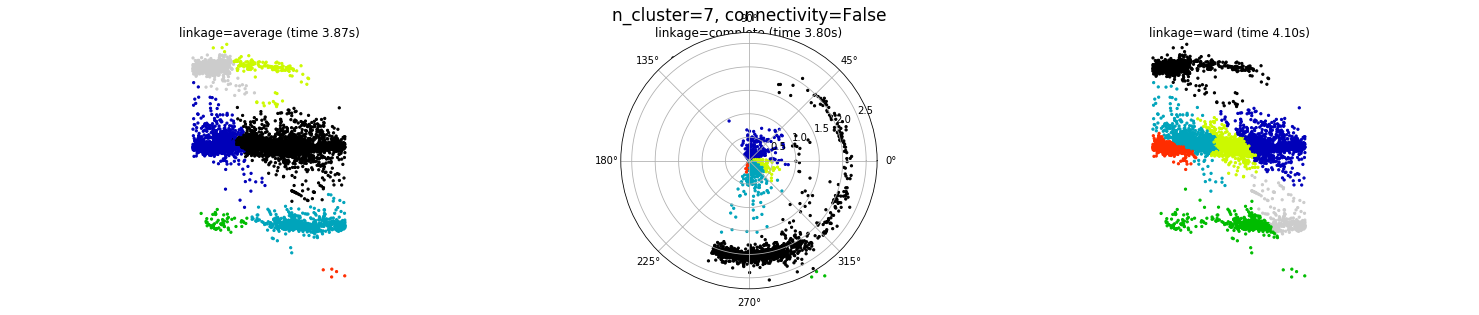

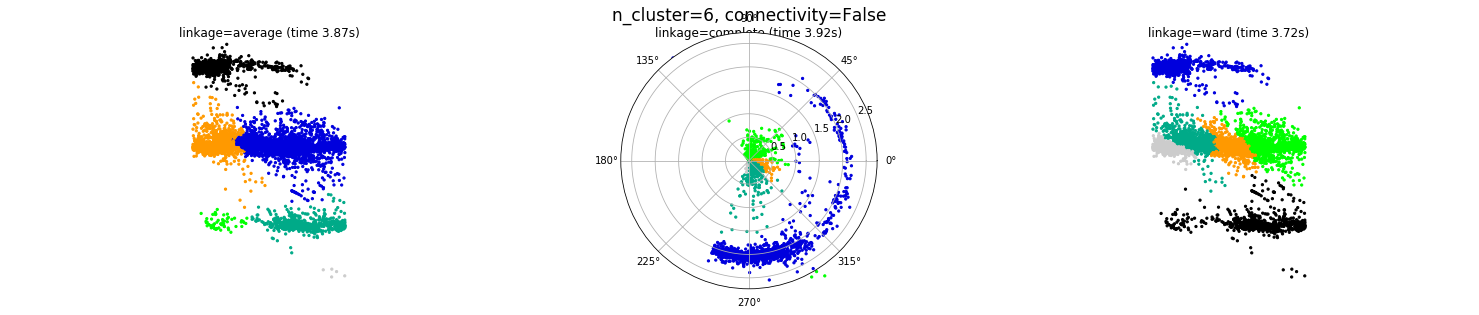

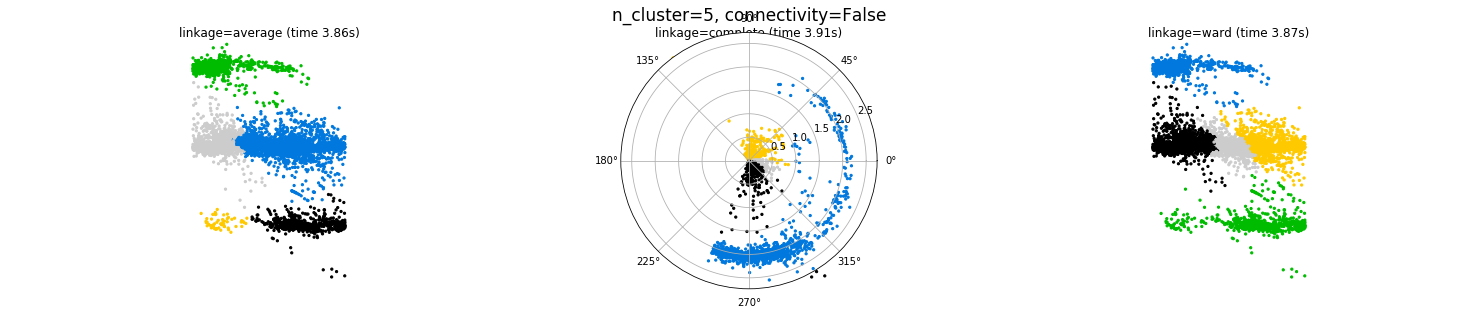

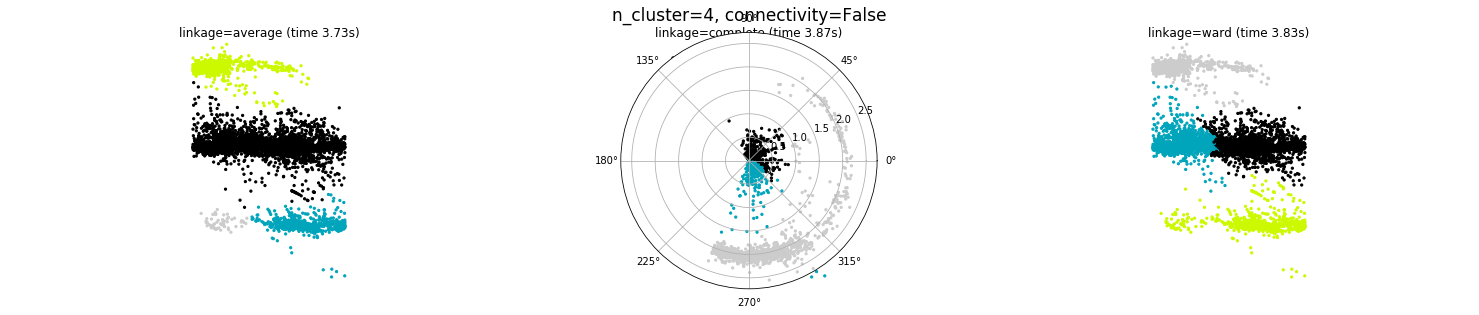

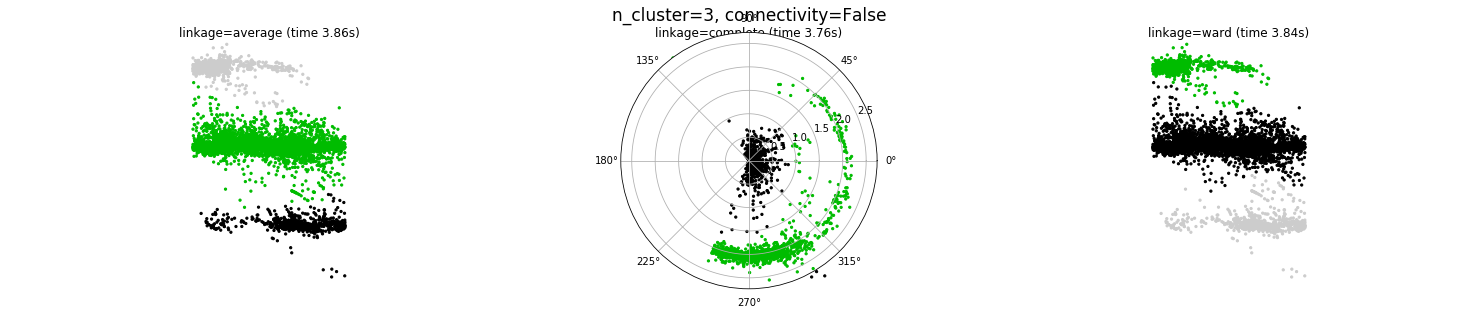

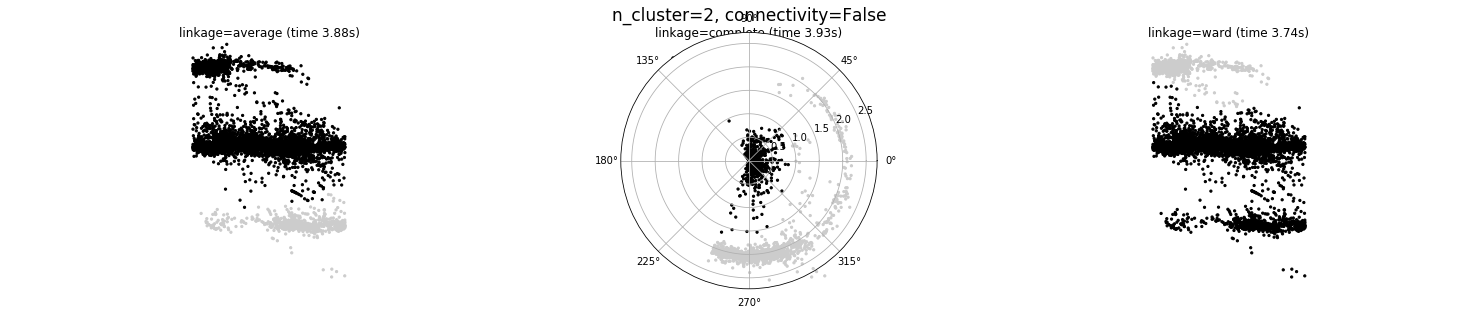

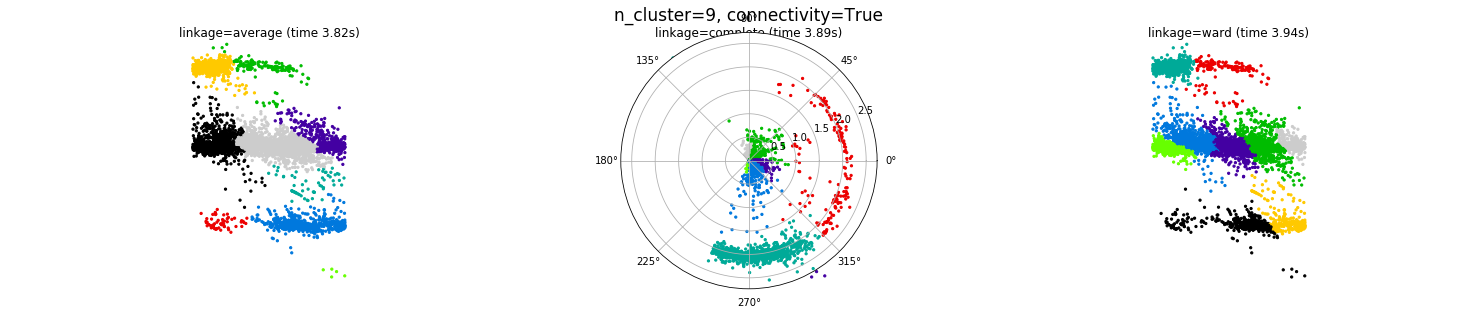

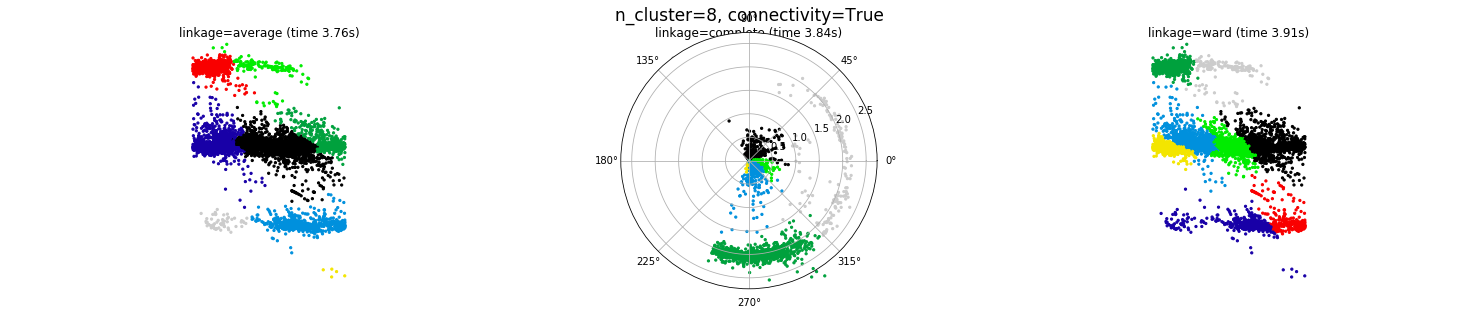

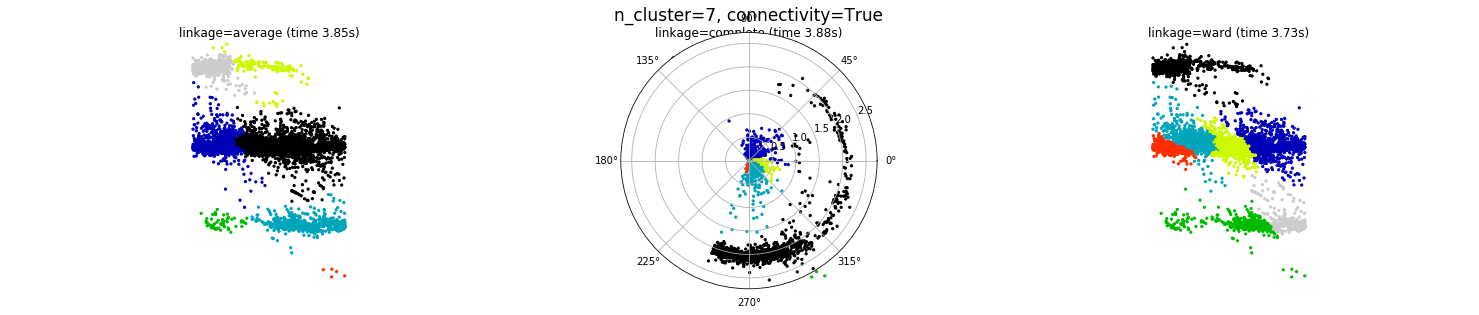

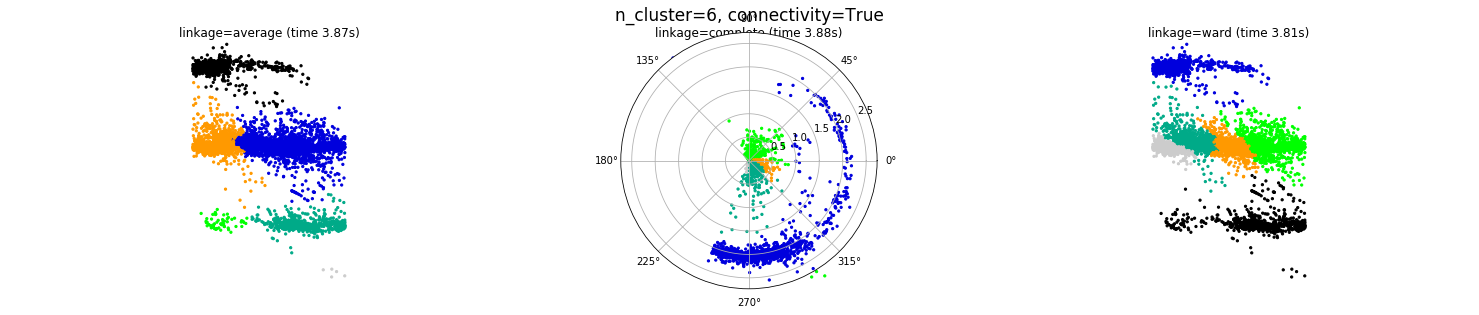

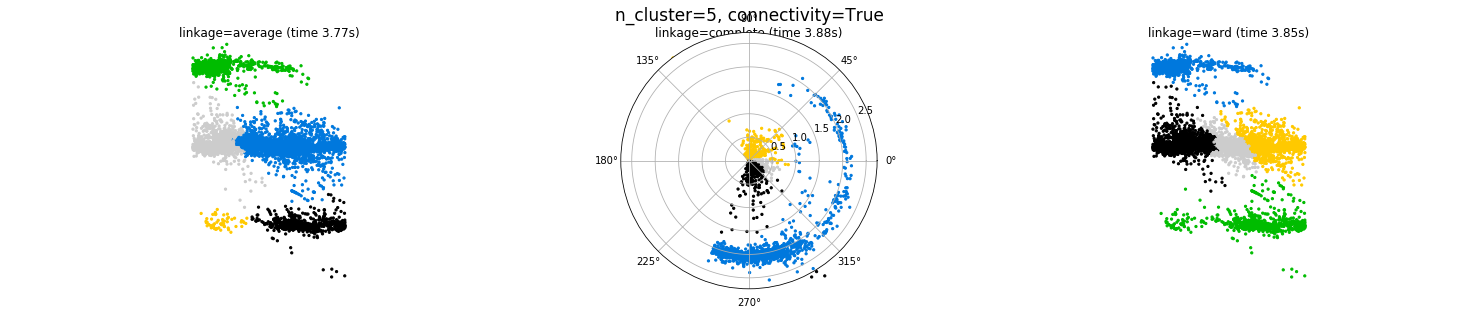

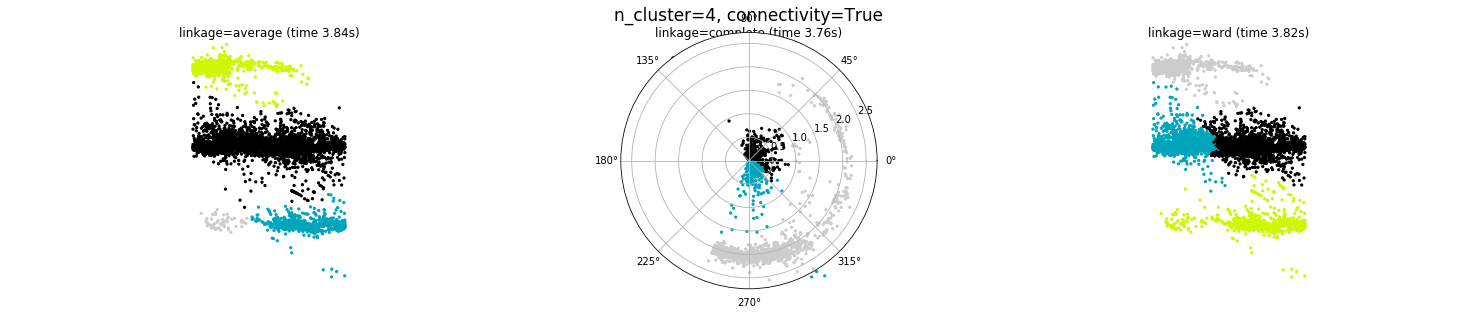

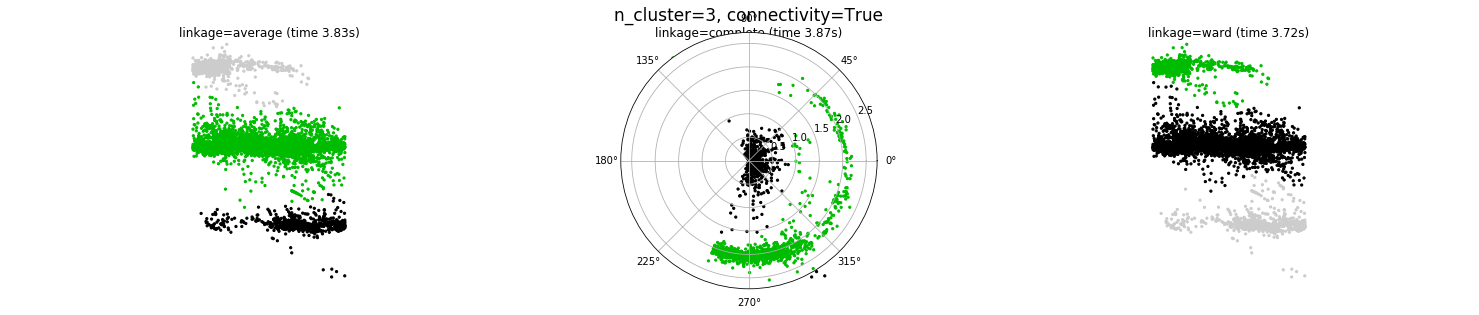

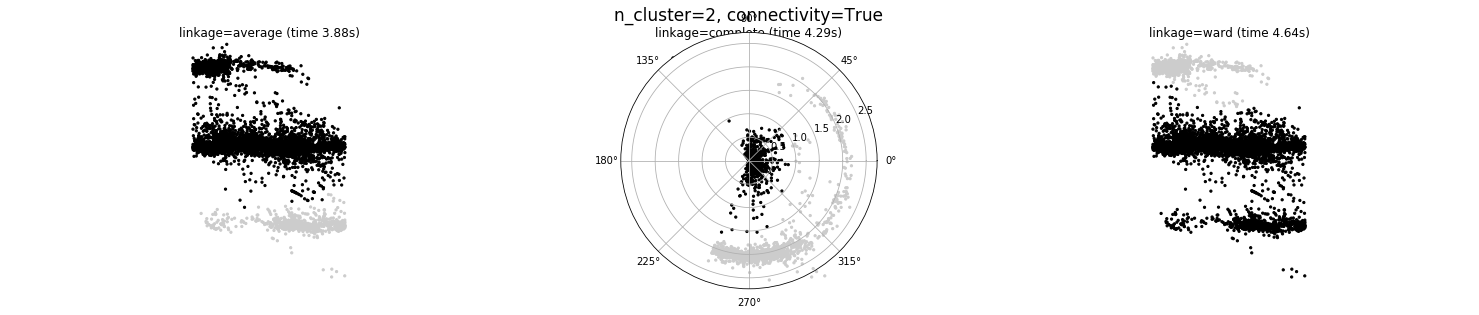

In [67]:

# Authors: Gael Varoquaux, Nelle Varoquaux
# License: BSD 3 clause

# Create a graph capturing local connectivity. Larger number of neighbors
# will give more homogeneous clusters to the cost of computation
# time. A very large number of neighbors gives more evenly distributed
# cluster sizes, but may not impose the local manifold structure of
# the data

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='polar')

# ax.scatter(StandardScalerX[:,0], StandardScalerX[:,1], c=model.labels_, cmap=plt.cm.rainbow, s=5)

for connectivity in (None, knn_graph):
    for n_clusters in (9, 8, 7, 6, 5, 4, 3, 2):
        fig = plt.figure(figsize=(20, 4))
        for index, linkage in enumerate(('average', 'complete', 'ward')):
            plt.subplot(1, 3, index + 1)
            model = AgglomerativeClustering(linkage=linkage,
                                            n_clusters=n_clusters)
            t0 = time.time()
            model.fit(StandardScalerX)
            elapsed_time = time.time() - t0
            plt.scatter(StandardScalerX[:, 0], StandardScalerX[:, 2], c=model.labels_,
                        cmap=plt.cm.nipy_spectral, s=5)
            plt.title('linkage=%s (time %.2fs)' % (linkage, elapsed_time),
                      fontdict=dict(verticalalignment='top'))
            plt.axis('equal')
            plt.axis('off')
            plt.subplots_adjust(bottom=0, top=.89, wspace=0,
                                left=0, right=1)
            plt.suptitle('n_cluster=%i, connectivity=%r' %
                         (n_clusters, connectivity is not None), size=17)
            ax = fig.add_subplot(111, projection='polar')
            ax.scatter(StandardScalerX[:, 0], StandardScalerX[:, 2], c=model.labels_,
                        cmap=plt.cm.nipy_spectral, s=5)



##### Visualization of the options
#### I chose to visualize both the cartesian and polar projections of the data since we have been looking at the cartesian projection throughout the project. The polar projection is easier for me to understand but I still wanted to include both for easier comparison to our other efforts. 
#### For each of the connectivity options (None and Knn) and each linkage option (Average, Complete, and Ward) I have graphed a range of clusters from two to nine.

##### Evaluation
#### Because we do not know the ground truth labels of the data, we are limited in how we can evaluate our clustering methods. Using  the Calinski Harabaz score is one of the choices for evaluation. The method is appropriate for this instance since we have a large dataset and fewer clusters.

## Modeling and Evaluation 4: Summarize the Ramifications

## KMEANS: Summarize the Ramifications

## DBSCAN: Summarize the Ramifications

## Agglomerative: Summarize the Ramifications

A higher Calinski Harabaz score indicates dense and well separated clusters and therefore indicates a better clustering paradigm. With the results shown above, we can see the highest Calinski Harabaz score (18962.50) was reached with 9 clusters, although all of the scores are quite high. Two and three clusters have the lowest scores by about half, while the best options appear to be 9, 4, 5, and 8.

It is interesting that there is a dip in optimization for 6 and 7 clusters. I am not sure why this would be.

## Deployment (10 points total)
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?

• How would your deploy your model for interested parties?

• What other data should be collected?

• How often would the model need to be updated, etc.?

The main use for clustering for this dataset would be for outlier detection. DBSCAN is a great way to identify points that do not connect to the larger population. Toward this aim, we did achieve our goal. Pattern Energy would find this outlier detection method very useful in production. These outliers can be removed to improve other calculations. The model could be deployed in batches as new data is generated. Points with a cluster label of negative one can be flagged for review or removal. No further data is needed. The model may need to be reviewed one a quarter as the environmental conditions for each season change. 

## Exceptional Work (10 points total)
• You have free reign to provide additional analyses or combine analyses.

Plotting the data in polar coordinates helps to illustrate the true nature of the data set. The error between wind direction and yaw position could be caused by a malfunction in the yaw system or a sensor calibration issue. 
* Parallel plotting of clusters **using what was shown in Unit 14**

### Running K-Means in Parallel [Exceptional Work]

Since each of the models can be fit independently of one another, It makes sense to try and parallelize the above and save the results to a file, or output them else where. This can greatly speed up the creation of the graphs.

**I have gotten the parallel function to work, however, the graphs are shown outside of the notebook. There are probably ways to display the results in the notebook, but I have not figured that out yet. I also can make this better via memory sharing ("memmapping"). I will get to this soon**

In [5]:
# Trying to fit the clusters and plot using parallelization for exceptional work

from IPython.parallel import Client
client = Client()

len(client)

/home/kyle/anaconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@kyle-Latitude-E6430')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


2

In [92]:
from sklearn.externals.joblib import Parallel, parallel_backend, register_parallel_backend
import ipyparallel as ipp

lv = client.load_balanced_view()

def plot_kmeans(number_clust):
    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    
    k_path = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Project3/"
    df = pd.read_csv(k_path + "SCADAcombined2017_T014_PROJECT3.csv")
    
    df_drop = df.dropna(axis=0)
    
    n_clust = number_clust

    X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


    cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
    cls_kmeans.fit(X1_drop)
    kmeans_labels  = cls_kmeans.labels_

    X1_drop = X1_drop.values
    plt.figure(figsize=(10,10))
    plt.scatter(X1_drop[:,0], X1_drop[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
    plt.ylabel("Yaw Position", fontsize=20)
    plt.xlabel("Wind Direction", fontsize=20)
    plt.axis('tight')
    plt.legend()
    plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
    plt.show()
        
lv.map(plot_kmeans, [3,4,5,6,7,8,9,10,11])

<AsyncMapResult: plot_kmeans>

In [39]:
list(model.labels_.unique())

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

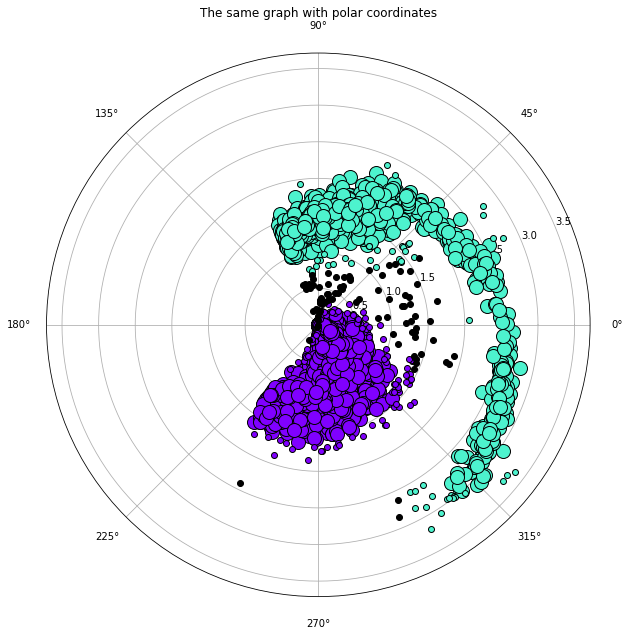

In [46]:
"""
Exceptional Work 
"""
import numpy as np
import matplotlib.pyplot as plt


r = df['wtc_ScYawPos_mean'] - df['WindDir_D1_WVT']
theta = df['WindDir_D1_WVT']
# colors = model.labels_

plt.figure(figsize=(10,10))
ax = plt.subplot(projection='polar')

# plt.figure(figsize=(15,10))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)
    
    xy = X[class_member_mask & core_samples_mask]
    ax.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    ax.plot(xy[:, 1], xy[:, 0], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
    
ax.set_title("The same graph with polar coordinates", va='bottom')

plt.show()

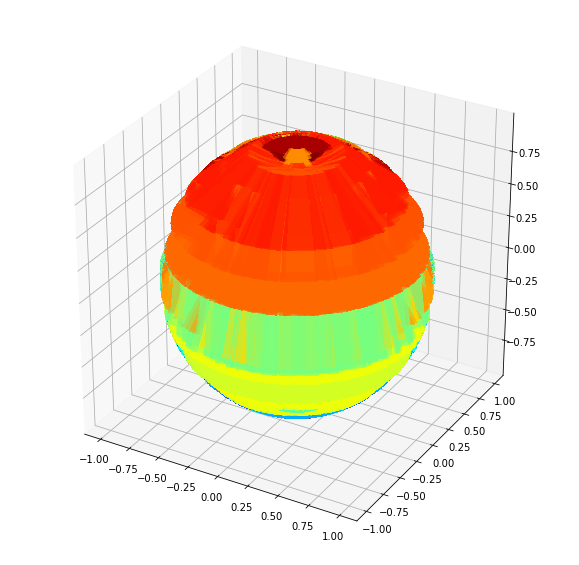

In [51]:
df2 = df.sample(500, replace=False)

import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d

# theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)

phi = df2['wtc_ScYawPos_mean'] - df2['WindDir_D1_WVT']
theta = df2['WindDir_D1_WVT']

THETA, PHI = np.meshgrid(theta, phi)
R = np.cos(PHI**2)
X = R * np.sin(PHI) * np.cos(THETA)
Y = R * np.sin(PHI) * np.sin(THETA)
Z = R * np.cos(PHI)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('jet'),
    linewidth=0, antialiased=False, alpha=0.5)

plt.show()

# Reference:
# https://matplotlib.org/examples/mplot3d/surface3d_radial_demo.html